In [18]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model


In [19]:
train_df, val_df = train_test_split(
    df_suffle,
    test_size=0.2,
    random_state=42,
    stratify=df_suffle['Brand']
)


In [20]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=2,
    brightness_range=[0.9, 1.1]
)

val_data = ImageDataGenerator(
    rescale=1./255
)


In [21]:
train_generator = train_data.flow_from_dataframe(
    train_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_data.flow_from_dataframe(
    val_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 520 validated image filenames belonging to 3 classes.
Found 130 validated image filenames belonging to 3 classes.


In [22]:
base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

base_model.trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(3,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3190 - loss: 1.4290 - val_accuracy: 0.6385 - val_loss: 0.8875
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.4224 - loss: 1.1286 - val_accuracy: 0.6692 - val_loss: 0.8094
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5841 - loss: 0.8814 - val_accuracy: 0.7538 - val_loss: 0.7365
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5405 - loss: 0.9502 - val_accuracy: 0.7385 - val_loss: 0.7245
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6058 - loss: 0.8086 - val_accuracy: 0.7538 - val_loss: 0.6805
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6127 - loss: 0.8127 - val_accuracy: 0.7154 - val_loss: 0.6696
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6310 - loss: 0.7719 - val_accuracy: 0.7308 - val_loss: 0.6284
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5613 - loss: 0.7950 - val_accuracy: 0.7385 - val_loss: 0.6473
Epo

In [25]:
train_df,temp_df=train_test_split(
    df_suffle,
    test_size=0.4,         
    stratify=df_suffle['Brand'],
    random_state=42
)

val_df,test_df= train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['Brand'],
    random_state=42
)

In [26]:
test_generator=val_data.flow_from_dataframe(
    test_df,
    x_col="Image",
    y_col="Brand",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=16,
    shuffle=False
)


Found 130 validated image filenames belonging to 3 classes.


In [27]:
test_loss,test_accuracy=model.evaluate(test_generator)
print("test_accuracy",test_accuracy)

c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 811ms/step - accuracy: 0.8290 - loss: 0.5032
test_accuracy 0.8384615182876587


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_true=val_generator.classes
y_pred=np.argmax(model.predict(val_generator),axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=val_generator.class_indices.keys()
))

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 962ms/step
              precision    recall  f1-score   support

       canon       0.82      0.90      0.86        50
       epson       0.83      0.58      0.68        50
          hp       0.72      0.97      0.83        30

    accuracy                           0.79       130
   macro avg       0.79      0.82      0.79       130
weighted avg       0.80      0.79      0.78       130



<Axes: >

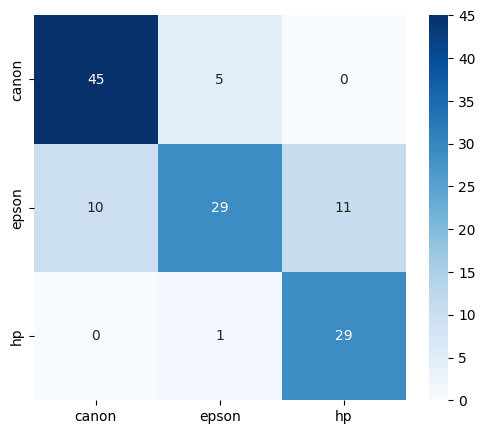

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys()
)


In [30]:
def grad_cam(model,image_array,last_conv1_layer_name):
    grad_model=Model([model.input],[model.get_layer(last_conv1_layer_name).output,model.output])
    
    
    with tf.GradientTape() as tap:
        conv_o, predictions = grad_model(image_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tap.gradient(loss, conv_o)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_o = conv_o[0]
    heatmap = conv_o @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

In [31]:
image_path=val_df.iloc[0]['Image']
imag_load=tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
image_array=tf.keras.preprocessing.image.img_to_array(imag_load)
image_array=np.expand_dims(image_array/255.0,axis=0)

heatmap=grad_cam(model,image_array,last_conv1_layer_name='Conv_1')

(-0.5, 1023.5, 1023.5, -0.5)

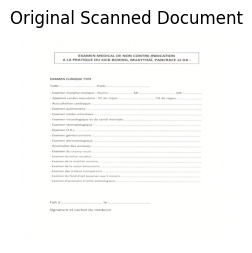

In [32]:
import cv2
original_img=cv2.imread(image_path)
original_img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
original_img=cv2.resize(original_img,(1024,1024))
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(original_img)
plt.title("Original Scanned Document")
plt.axis("off")

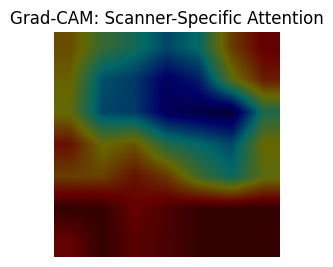

In [33]:
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed = heatmap * 0.4 + image_array[0]


plt.subplot(1,2,2)
plt.imshow(superimposed.astype("uint8"))
plt.title("Grad-CAM: Scanner-Specific Attention")

plt.axis("off")

plt.show()
